In [1]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 545 kB/s 
     |████████████████████████████████| 448 kB 66.8 MB/s 


In [ ]:
!pip install kss

     |████████████████████████████████| 42.4 MB 1.4 MB/s 
     |████████████████████████████████| 174 kB 34.7 MB/s 
  Created wheel for kss: filename=kss-3.3.1.1-py3-none-any.whl size=42449241 sha256=0ee901d3a6efd971ef1782bfd7746d510aaaf39e051debbcacb59479e8d9b2ed
  Stored in directory: /root/.cache/pip/wheels/6e/9d/1d/52871154eff5273abb86b96f4f984c1cd67c5bde64239b060a
  Created wheel for emoji: filename=emoji-1.6.3-py3-none-any.whl size=170298 sha256=e3fc7e7259713201e33326969d68c7ac613bc9ddabe45c5516162060664a352c
  Stored in directory: /root/.cache/pip/wheels/03/8b/d7/ad579fbef83c287215c0caab60fb0ae0f30c4d7ce5f580eade
Successfully built kss emoji


In [ ]:
!pip install pororo
from pororo import Pororo

     |████████████████████████████████| 256 kB 5.4 MB/s 
     |████████████████████████████████| 748.8 MB 19 kB/s 
     |████████████████████████████████| 3.1 MB 35.9 MB/s 
     |████████████████████████████████| 468 kB 34.7 MB/s 
     |████████████████████████████████| 1.7 MB 27.0 MB/s 
     |████████████████████████████████| 5.9 MB 26.9 MB/s 
     |████████████████████████████████| 79 kB 7.8 MB/s 
     |████████████████████████████████| 1.2 MB 44.5 MB/s 
     |████████████████████████████████| 3.5 MB 41.3 MB/s 
     |████████████████████████████████| 1.5 MB 30.5 MB/s 
     |████████████████████████████████| 145 kB 49.4 MB/s 
     |████████████████████████████████| 90 kB 8.3 MB/s 
     |████████████████████████████████| 748 kB 45.4 MB/s 
     |████████████████████████████████| 1.2 MB 47.5 MB/s 
     |████████████████████████████████| 67 kB 4.4 MB/s 
     |████████████████████████████████| 6.8 MB 30.7 MB/s 
     |████████████████████████████████| 895 kB 58.5 MB/s 
     |███████████████

In [2]:
import re
#import kss
import numpy as np
import pandas as pd
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from gensim import corpora 
from gensim import models
from PIL import Image
import platform                
from matplotlib import font_manager, rc
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import TfidfVectorizer

plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin': # 맥os
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')
    
elif platform.system() == 'Windows':# 윈도우
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-darkgrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/
    rc('font', family=font_name)


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd /content/drive/MyDrive/project_ie/

/content/drive/MyDrive/project_ie


In [ ]:
data = pd.read_csv('sent2021.csv', index_col = 0)

In [ ]:
final_sent = data['0'].tolist()
print(final_sent)

['약대 수의대', '학점은행제 산업공학과 전문대 산업경영과 졸업한 후하는 법', '감사합니다', '네 됩니다', '일단 급여부터 차이 심합니다', '네트워크 오래 해도 비전 없고요', '갈 곳도 별로 없습니다', '개발 쪽은 회사 소속으로도 있지만 프리도 해도 찾는 곳 널렸습니다', '없어서 서로 데려가려 합니다', '산업공학과란', '산업공학과는 어떤 학문일까 공학 계열의 학과로 공과대학의 경영학과라고 합니다', '특정 산업에만 국한한 것이 아닌 모든 산업 분야에 응용이 가능하며 인력 기계 기술 그리고 조직 커뮤니케이션 등에서 최적의 시스템을 연구합니다', '그리고 공과대학의 마에스트로로 불리는데 공과대학의 여러 전문 기술이 산업에 어떻게 접목되는지를 연구하고 산업 안에서 기술의 연결과 융합을 도모하는 학문이기 때문입니다', '간호학과에서는 어떤 과목을 배우나요 경영과학 경영과학특론 경영전략론 경제성 공학 의사결정론 인간공학 인공지능론 품질경영 품질 공학 환경경영 산업물류론 생산 경영론 데이터마이닝 등을 배웁니다', '산업공학과 유사학과는 무엇인가요 글로벌융합산업공학과 산업시스템공학과 해양산업공학과 등 산업공학과 졸업 후 진로는 어떻게 되나요 경영컨설턴트 변리사 산업공학 기술자 연구실 안전 전문가 품질관리 사무원 품질인증심사 전문가 전문가 등이 될 수 있습니다', '관련 자격증이나 자격시험은 무엇인가요 물류관리기사 산업안전기사 정보처리기사 품질경영기사 품질관리기사 인간공학 기사 등입니다', '산업공학과에 필요한 역량과 적성은 무엇입니까 경영학 마인드를 가진 이공계 학생에게 적절해 보입니다 자연과학과 사회과학에 대한 다양한 관심이 있다면 좋습니다', '문제해결 능력 논리적 사고력 독창성 유연한 사고 상황 대처 능력 통합적 사고 등이 필요합니다', '산업공학과에 가기 위해 어떤 과목을 들으면 좋을까요 수학 미적분 확률과 통계 기하 경제 수학 경제 물리학 화학 정보 융합과학 등 간호학 학생이 주고 싶은 조언이 있나요 가능하다면 자대 병원이 있는 곳을 택하세요',

# 긍부정 분석

In [ ]:
#### 5. pororo few shot tag 추출 [ 추가 ]
sa = Pororo(task="sentiment", model="brainbert.base.ko.nsmc", lang="ko")
# sa("이걸 산 내가 레전드", show_probs=True)

review_tag = []
for i in range(len(final_sent)):
  print(i)
  try : 
    review_tag.append(sa(final_sent[i]))
  except TypeError:
    review_tag.append('None')
print(review_tag)

In [ ]:
final_2021 = pd.DataFrame({'sentence': final_sent, 'sentiment': review_tag})
print(final_2021)

                                                sentence sentiment
0                                                 약대 수의대  Positive
1                        학점은행제 산업공학과 전문대 산업경영과 졸업한 후하는 법  Negative
2                                                  감사합니다  Positive
3                                                  네 됩니다  Negative
4                                        일단 급여부터 차이 심합니다  Negative
...                                                  ...       ...
13383  교육 컨설팅 및 상담 예약 아이티뱅크 아이티뱅크의 종로 강남 노량진 부산 모든 지점...  Positive
13384                 원래 산업공학 생각했으면 정시 템이 적성에 더 맞을 겁니다 영  Negative
13385                                   커리큘럼을 직접 확인해 보세요  Negative
13386                                           교과 안내 학부  Negative
13387                                  안전 및 산업경영공학과 교수연수  Positive

[13388 rows x 2 columns]


In [ ]:
del_none = final_2021[final_2021['sentiment']=='None'].index

In [ ]:
final_2021.drop(del_none, inplace=True)
print(final_2021)

                                                sentence sentiment
0                                                 약대 수의대  Positive
1                        학점은행제 산업공학과 전문대 산업경영과 졸업한 후하는 법  Negative
2                                                  감사합니다  Positive
3                                                  네 됩니다  Negative
4                                        일단 급여부터 차이 심합니다  Negative
...                                                  ...       ...
13383  교육 컨설팅 및 상담 예약 아이티뱅크 아이티뱅크의 종로 강남 노량진 부산 모든 지점...  Positive
13384                 원래 산업공학 생각했으면 정시 템이 적성에 더 맞을 겁니다 영  Negative
13385                                   커리큘럼을 직접 확인해 보세요  Negative
13386                                           교과 안내 학부  Negative
13387                                  안전 및 산업경영공학과 교수연수  Positive

[13300 rows x 2 columns]


In [ ]:
final_2021.to_csv('./final2021.csv')

In [ ]:
final_2021 = pd.read_csv('./final2021.csv')

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

import matplotlib.font_manager as fm

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()

plt.rc('font', family=font_name)

fm._rebuild()

Selecting previously unselected package fonts-nanum.
(Reading database ... 155113 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


# 클러스터 키워드 포함 문장 추출

In [ ]:
cls = pd.read_csv('/content/drive/MyDrive/project_ie/class_fianl.csv')

In [ ]:
cls_list = cls['Label']

In [ ]:
new_df =pd.DataFrame(columns=['sentence', 'sentiment'])
num = 0
for i in cls_list:
  num += len(final_2021[final_2021['sentence'].str.contains(i, na = False)])
  new_df = new_df.append(final_2021[final_2021['sentence'].str.contains(i, na = False)])
print(num)
print(len(new_df))

63776
63776


In [ ]:
new_df = new_df.drop_duplicates(['sentence'])

In [ ]:
new_df

sentence sentiment  Unnamed: 0
4710   구조역학 열역학노승탁 저 공업열역학 제판 장장노승탁 저 공업열역학 제판 장장 공기역...  Positive      4741.0
2152   현재 바이오나노공학의 지식 습득을 위해 생화학 유기화학 분석화학 물리화학 생명나노공...  Positive      2167.0
2155   무엇을 배우나요 학년과 비전설계 아카데믹 글쓰기 일반화학 일반생물학 일반물리학 미분...  Negative      2170.0
3655   가장 대표적인 회사는 세계 위를 얼마 전에 달성한 화학회사인 화학이다 화학 외에도 ...  Positive      3682.0
4709   구조역학 열역학 공기역학 공학수학 항공 우주 제어 문제를 모두 확인한 후 과목을 선...  Negative      4740.0
...                                                  ...       ...         ...
860                    그 외엔 성균관이 그나마 좋은 편이라고 봐요 전 한양 대고요  Negative       863.0
2226   알아보기 한양대학교 서울캠퍼스 논술 전형 알아보기 서강대학교 논술 전형 알아보기 성...  Positive      2242.0
3810                                    성균관대학교 박성준 멘토입니다  Positive      3837.0
5527   한다 건국대 단국대 죽전 서울과 기대 성균관대 중 전주에 나서 학생들이 자주 거론되...  Positive      5566.0
10190                성균관대 잘 본 것 같지도 못 본 것 같지도 않은 느낌이었습니다  Negative     10256.0

[9601 rows x 3 columns]

### LDA를 위해 긍정 / 부정 데이터 각각 나눔

In [ ]:
neg = new_df[new_df['sentiment']=='Negative']
pos = new_df[new_df['sentiment']=='Positive']

In [ ]:
neg.to_csv('final_neg_2021.csv')
pos.to_csv('final_pos_2021.csv')

## LDA

In [5]:
neg = pd.read_csv('final_neg_2021.csv')
pos = pd.read_csv('final_pos_2021.csv')

In [ ]:
pos

sentence sentiment  Unnamed: 0
4710  구조역학 열역학노승탁 저 공업열역학 제판 장장노승탁 저 공업열역학 제판 장장 공기역...  Positive      4741.0
2152  현재 바이오나노공학의 지식 습득을 위해 생화학 유기화학 분석화학 물리화학 생명나노공...  Positive      2167.0
3655  가장 대표적인 회사는 세계 위를 얼마 전에 달성한 화학회사인 화학이다 화학 외에도 ...  Positive      3682.0
4955  무엇을 배우나요 학년과 비전설계 미분적분학 소프트웨어의 이해 일반물리학 일반물리학 ...  Positive      4988.0
6915  많은 학생들이 기계공학과 기계설계 공학의 차이점을 명확하게 구분하지 못하는데 기계설...  Positive      6962.0
...                                                 ...       ...         ...
6287                            건국대가 좀 낫긴 한데 인하대도 괜찮습니다  Positive      6331.0
6959                                          괜찮은 것 같아요  Positive      7006.0
2226  알아보기 한양대학교 서울캠퍼스 논술 전형 알아보기 서강대학교 논술 전형 알아보기 성...  Positive      2242.0
3810                                   성균관대학교 박성준 멘토입니다  Positive      3837.0
5527  한다 건국대 단국대 죽전 서울과 기대 성균관대 중 전주에 나서 학생들이 자주 거론되...  Positive      5566.0

[6547 rows x 3 columns]

In [6]:
# 불용어 제거
stopwords=['의','가','이','은','들','는','좀','잘','걍','과','도','를','있다','산업','공학','산업공학과','산공','합니다','으로','요','대한','대해','안','회원','쪽','있습니다','글','생각','준비','업','독','취사','있을까요','조금','눈','네이버','공부','과정',
           '자','에','와','한','하다','그리고','넘','네','을','랑','예요','오','여서','사람','여러분','진짜','학년','관련','및','그냥','같습니다','리스트','부분','없습니다','저작권','등','정도','가야','부탁드립니다'
           ,'이에요','데','것','그','저','더','같아요','근데','듯','입니다','명','댓글','있는','이상','없는','다시','건','관리자','이야기','전','가요','이런','식','이후','산업','학과','공학','영상','진행','학교','어디','문제',
           '에게','에서','라서','이라서','에요','와','만','나','로','레이어','사이트','바로','말씀','이랑','내','엔','아','부터','수','안녕하세요','도움','현재','있어요','어떻게','추천','좋은','다른','학생','무료','필요','대학교','대학','전공','클릭',
           '때','거','다','이다','이나','에도','것','고','게','인데','플레이어','도움말','제','까지','제작','작성','확인','여기','포스팅','모든','에는','엔','이라','작성자','게시','고민','조언','비슷한','라면','어떤','본인','먼저','지금','독취','저작','카페','이유','콘텐츠','감사',
          '약간','오늘','점','없이','자꾸','알','있','다니','또','어','딱','걍','더','중','니','저','면','듯','분야','같은','시스템','경우','시간','소개','많은','내용','있고','있으며','때문','통해','정말']

In [7]:
neg = neg.dropna(axis=0)
pos = pos.dropna(axis=0)

In [ ]:
pos

sentence sentiment  Unnamed: 0
4710  구조역학 열역학노승탁 저 공업열역학 제판 장장노승탁 저 공업열역학 제판 장장 공기역...  Positive      4741.0
2152  현재 바이오나노공학의 지식 습득을 위해 생화학 유기화학 분석화학 물리화학 생명나노공...  Positive      2167.0
3655  가장 대표적인 회사는 세계 위를 얼마 전에 달성한 화학회사인 화학이다 화학 외에도 ...  Positive      3682.0
4955  무엇을 배우나요 학년과 비전설계 미분적분학 소프트웨어의 이해 일반물리학 일반물리학 ...  Positive      4988.0
6915  많은 학생들이 기계공학과 기계설계 공학의 차이점을 명확하게 구분하지 못하는데 기계설...  Positive      6962.0
...                                                 ...       ...         ...
6287                            건국대가 좀 낫긴 한데 인하대도 괜찮습니다  Positive      6331.0
6959                                          괜찮은 것 같아요  Positive      7006.0
2226  알아보기 한양대학교 서울캠퍼스 논술 전형 알아보기 서강대학교 논술 전형 알아보기 성...  Positive      2242.0
3810                                   성균관대학교 박성준 멘토입니다  Positive      3837.0
5527  한다 건국대 단국대 죽전 서울과 기대 성균관대 중 전주에 나서 학생들이 자주 거론되...  Positive      5566.0

[6547 rows x 3 columns]

In [9]:
# tokenization 함수를 만들어둠
def tokenize_text(text):
  
    okt = Okt()
    Okt_morphs = okt.pos(text, stem=True)   
    words = []
    for word, pos in Okt_morphs:
        if pos == 'Noun':   # or pos == 'Verb' or pos == 'Adjective' 
            words.append(word)
    
    new_word_list = []
    for word in words:
      if word not in stopwords and len(word)>1 :
        new_word_list.append(word)
    words_str = ' '.join(new_word_list) 
    return words_str

In [ ]:
# neg_texts = [[word for word in document.split() if word not in stopwords and len(word) >1]
#         for document in neg_list]

In [10]:
neg_texts = []
for text in neg['sentence']:
  neg_texts.append(tokenize_text(text))
print(len(neg_texts))
print(neg_texts[0])

3054
무엇 전설 아카데믹 글쓰기 일반화학 일반생물학 일반물리학 미분적분학 일반물리학 실험 일반화학 실험 인공 지능 미래 사회 소프트웨어 이해 중국어 생명 나노 입문 생명 물리화학 생명 유기화학 생화학 생명 공업 수학 생명 분석화학 미생물 기초 바이러스 생명공학 실험 학술 영어 통합 학술 영어 글쓰기 과취 창업 진로 탐색 재료공학 개론 고분자 생리학 분자 세포생물학 생명공학 개론 유기 전자 소재 분자 생물 반응 합성 생물공학 센서 생명 열역학 나노 바이오 소재 생명 나노 연구실 심화 실습 나노 실험 생명 나노 스톤 디자인 역량 계발 나노재료 나노 의학 기술 작문 발표 의약 소자 바이오 생체 모방 기기 분석 통계 분석 실험 설계 생명 나노 연구실 심화 실습 생명 나노 스톤 디자인 장학금 제도


In [ ]:
dictionary = corpora.Dictionary(neg_texts)            

In [ ]:
corpus = [dictionary.doc2bow(text) for text in neg_texts]   
print('corpus : {}'.format(corpus))

corpus : [[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 2), (6, 1), (7, 1), (8, 1), (9, 8), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 2), (20, 1), (21, 1), (22, 2), (23, 1), (24, 2), (25, 1), (26, 1), (27, 10), (28, 2), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 2), (38, 1), (39, 1), (40, 2), (41, 2), (42, 5), (43, 2), (44, 1), (45, 1), (46, 2), (47, 1), (48, 2), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 2), (56, 1), (57, 2), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 1), (68, 1), (69, 1), (70, 1), (71, 1), (72, 2), (73, 1)], [(39, 1), (47, 1), (74, 2), (75, 1), (76, 1), (77, 2), (78, 1), (79, 1), (80, 2), (81, 1), (82, 1), (83, 2), (84, 1), (85, 1), (86, 2), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1)], [(93, 1), (94, 1), (95, 1), (96, 1), (97, 1), (98, 1), (99, 1), (100, 1)], [(100, 1), (101, 1), (102, 2), (103, 2), (104, 1)], [(76, 5), (85

In [ ]:
lda = models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, 
        num_topics=15, random_state = 1)       

for t in lda.show_topics():  
	print(t)

[Korean Sentence Splitter]: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy


(5, '0.016*"취업" + 0.015*"면접" + 0.011*"자격증" + 0.011*"재수" + 0.010*"학원" + 0.009*"인자" + 0.009*"수업" + 0.008*"졸업" + 0.008*"질문" + 0.008*"경험"')
(6, '0.012*"과목" + 0.011*"지원" + 0.011*"전형" + 0.010*"선택" + 0.010*"교과" + 0.009*"캐시" + 0.009*"문과" + 0.008*"등급" + 0.008*"자격증" + 0.008*"내신"')
(8, '0.013*"환경" + 0.009*"정보" + 0.009*"안내" + 0.008*"사항" + 0.008*"취득" + 0.008*"학기" + 0.007*"관리" + 0.007*"전형" + 0.007*"기사" + 0.006*"합격"')
(14, '0.015*"생활" + 0.015*"출처" + 0.013*"컴공" + 0.008*"업데이트" + 0.007*"과목" + 0.007*"학력" + 0.006*"취업" + 0.006*"학기" + 0.006*"출석" + 0.006*"정보"')
(4, '0.020*"편입" + 0.019*"학사" + 0.015*"학점은행제" + 0.014*"학위" + 0.011*"서울대" + 0.010*"기계공학" + 0.010*"학점" + 0.010*"영어" + 0.009*"졸업" + 0.008*"시험"')
(0, '0.012*"공대" + 0.008*"정보" + 0.008*"성적" + 0.008*"대학원" + 0.007*"학점" + 0.007*"면접" + 0.006*"편입" + 0.006*"경로" + 0.006*"자료" + 0.006*"인적"')
(13, '0.027*"활동" + 0.011*"답변" + 0.011*"면접" + 0.010*"기준" + 0.010*"지원" + 0.007*"이해" + 0.007*"설명" + 0.006*"참여" + 0.006*"위해" + 0.006*"유학"')
(10, '0.016*"수학" + 0.011*"시험" + 0.011*"미적분

In [ ]:
wordcloud = WordCloud(width=1000, height=600, background_color="white", random_state=0, font_path=path)
plt.figure(figsize=(30,30))
for t in range(lda.num_topics):
    plt.subplot(5,4,t+1)
    x = dict(lda.show_topic(t,200))
    im = wordcloud.generate_from_frequencies(x)
    plt.imshow(im)
    plt.axis("off")
    plt.title("Topic #" + str(t))

Output hidden; open in https://colab.research.google.com to view.

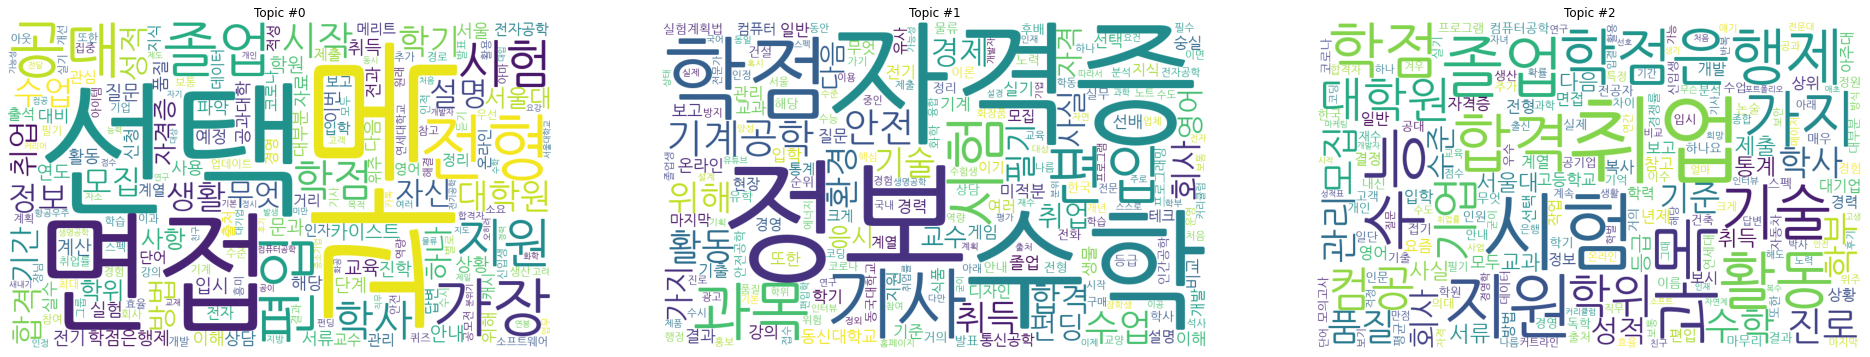

In [ ]:
wordcloud = WordCloud(width=1000, height=600, background_color="white", random_state=0, font_path=path)
plt.figure(figsize=(45,45))
for t in range(lda.num_topics):
    plt.subplot(5,4,t+1)
    x = dict(lda.show_topic(t,200))
    im = wordcloud.generate_from_frequencies(x)
    plt.imshow(im)
    plt.axis("off")
    plt.title("Topic #" + str(t))

## 다른 코드

# https://chaelist.github.io/docs/ml_application/topic_modeling/

In [ ]:
# tokenization 함수를 만들어둠
def tokenize_text(text):
  
    okt = Okt()
    Okt_morphs = okt.pos(text, stem=True)   
    words = []
    for word, pos in Okt_morphs:
        if pos == 'Noun':   # or pos == 'Verb' or pos == 'Adjective' 
            words.append(word)
    
    new_word_list = []
    for word in words:
      if word not in stopwords and len(word)>1 :
        new_word_list.append(word)
    words_str = ' '.join(new_word_list) 
    return words_str

In [11]:
neg_texts = []
for text in neg['sentence']:
  neg_texts.append(tokenize_text(text))
print(len(neg_texts))
print(neg_texts[0])

3054
무엇 전설 아카데믹 글쓰기 일반화학 일반생물학 일반물리학 미분적분학 일반물리학 실험 일반화학 실험 인공 지능 미래 사회 소프트웨어 이해 중국어 생명 나노 입문 생명 물리화학 생명 유기화학 생화학 생명 공업 수학 생명 분석화학 미생물 기초 바이러스 생명공학 실험 학술 영어 통합 학술 영어 글쓰기 과취 창업 진로 탐색 재료공학 개론 고분자 생리학 분자 세포생물학 생명공학 개론 유기 전자 소재 분자 생물 반응 합성 생물공학 센서 생명 열역학 나노 바이오 소재 생명 나노 연구실 심화 실습 나노 실험 생명 나노 스톤 디자인 역량 계발 나노재료 나노 의학 기술 작문 발표 의약 소자 바이오 생체 모방 기기 분석 통계 분석 실험 설계 생명 나노 연구실 심화 실습 생명 나노 스톤 디자인 장학금 제도


In [12]:
count_vectorizer = CountVectorizer(max_df=0.1, max_features=500, min_df=2, ngram_range=(1,2
                                                                                      ))
feat_vect = count_vectorizer.fit_transform(neg_texts)
print('CountVectorizer Shape:', feat_vect.shape)

CountVectorizer Shape: (3054, 500)


In [ ]:
print(count_vectorizer.vocabulary_)

{'무엇': 288, '실험': 487, '인공': 627, '지능': 789, '미래': 301, '사회': 373, '소프트웨어': 428, '이해': 623, '생명': 383, '나노': 157, '수학': 445, '기초': 150, '바이러스': 306, '생명공학': 386, '영어': 545, '통합': 880, '창업': 818, '진로': 806, '전자': 720, '소재': 426, '생물': 388, '바이오': 307, '연구실': 537, '심화': 493, '실습': 483, '스톤': 456, '디자인': 237, '역량': 532, '기술': 142, '발표': 317, '분석': 351, '통계': 877, '설계': 412, '장학금': 685, '제도': 745, '인공 지능': 628, '생명 나노': 384, '항공': 961, '우주': 581, '제어': 748, '모두': 275, '과목': 79, '선택': 409, '해결': 963, '면접': 272, '구술': 105, '고사': 57, '시행': 465, '석사과정': 404, '시험': 466, '범위': 330, '다음': 179, '과목 선택': 81, '사용': 365, '그것': 117, '모임': 280, '출신': 839, '주변': 769, '지인': 799, '답변': 189, '인터넷': 643, '교육': 97, '결과': 33, '자신': 673, '위해': 591, '사항': 372, '이번': 616, '최종': 834, '표준': 903, '점수': 729, '평균': 898, '참고': 816, '선문대': 405, '산업혁명': 374, '시대': 461, '지식': 795, '경영학': 41, '융합': 602, '인재': 635, '양성': 513, '목표': 286, '선택 과목': 410, '과목 평균': 82, '적성': 696, '프로그래밍': 909, '언어': 520, '수준': 443, '개발': 14, '프로

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv = TfidfVectorizer().fit(neg_texts)
#print(tfidfv.transform(neg_texts).toarray())
print(tfidfv.vocabulary_)

{'무엇': 1402, '전설': 3526, '아카데믹': 2517, '글쓰기': 580, '일반화학': 3239, '일반생물학': 3237, '일반물리학': 3236, '미분적분학': 1460, '실험': 2467, '인공': 3169, '지능': 3843, '미래': 1452, '사회': 1944, '소프트웨어': 2207, '이해': 3158, '중국어': 3791, '생명': 2020, '나노': 710, '입문': 3282, '물리화학': 1433, '유기화학': 2978, '생화학': 2041, '공업': 348, '수학': 2284, '분석화학': 1795, '미생물': 1463, '기초': 665, '바이러스': 1497, '생명공학': 2021, '학술': 4593, '영어': 2754, '통합': 4312, '과취': 400, '창업': 3977, '진로': 3908, '탐색': 4266, '재료공학': 3437, '개론': 116, '고분자': 288, '생리학': 2019, '분자': 1798, '세포생물학': 2165, '유기': 2977, '전자': 3534, '소재': 2201, '생물': 2024, '반응': 1527, '합성': 4654, '생물공학': 2025, '센서': 2167, '열역학': 2734, '바이오': 1499, '연구실': 2703, '심화': 2477, '실습': 2452, '스톤': 2338, '디자인': 1134, '역량': 2685, '계발': 254, '나노재료': 712, '의학': 3077, '기술': 638, '작문': 3378, '발표': 1548, '의약': 3067, '소자': 2200, '생체': 2038, '모방': 1352, '기기': 615, '분석': 1794, '통계': 4301, '설계': 2111, '장학금': 3425, '제도': 3654, '구조역학': 491, '공기역학': 325, '항공': 4657, '우주': 2896, '제어': 3666, '모두': 1348, '과

In [30]:
lda = LatentDirichletAllocation(n_components=13)
lda.fit(feat_vect)

LatentDirichletAllocation(n_components=13)

In [31]:
LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=13, n_jobs=None,  perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

LatentDirichletAllocation(n_components=13)

In [32]:
def display_topics(model, feature_names, num_top_words):
    for topic_index, topic in enumerate(model.components_):
        print('Topic #', topic_index)

        # components_ array에서 가장 값이 큰 순으로 정렬했을 때, 그 값의 array index를 반환. 
        topic_word_indexes = topic.argsort()[::-1]
        top_indexes=topic_word_indexes[:num_top_words]
        
        # top_indexes대상인 index별로 feature_names에 해당하는 word feature 추출 후 join으로 concat
        feature_concat = ' '.join([feature_names[i] for i in top_indexes])                
        print(feature_concat)

# CountVectorizer객체내의 전체 word들의 명칭을 get_features_names( )를 통해 추출
feature_names = count_vectorizer.get_feature_names()

# Topic별 가장 연관도가 높은 word 추출
display_topics(lda, feature_names, 50)

Topic # 0
안전 시험 취득 기사 학위 학점은행제 자격증 과목 학사 학사 학위 학점 안전공학 필기 졸업 자격 실무 응시 기술 전문대 실기 안전 기사 년제 이수 학위 취득 자격증 취득 합격 경력 위험 방지 위험 방지 건설 방지 기술 인간공학 전공자 필기 시험 전기 작업 현대 그룹 안전 관리 복사 응시 자격 객관 기사 자격증 설비 접기 복사 접기 대표이사 사장 기간
Topic # 1
개발 수업 프로그래밍 코딩 컴퓨터 코로나 활용 우리 수준 보안 가지 질문 이해 학원 언어 소프트웨어 방식 아주대 빅데이터 이용 교수 가장 현실 느낌 제대로 네트워크 서비스 학습 알고리즘 기술 수원 사고 무엇 인터넷 지식 데이터 학문 입장 이기 다만 수험생 서버 상태 기존 위해 여러 운영 상담 필수 설명
Topic # 2
교과 전형 합격 논술 후기 자기 인재 평가 등급 종합 인터뷰 모집 우수 단어 출신 서류 경쟁률 내신 지원 실제 스펙 대부분 합격자 한국 마무리 주제 정원 카이스트 평균 지역 교통 선배 수시 다음 특정 졸업생 기본 입학 서울대 서울 졸업 활용 석사 한국 기술 전문대 졸업 기술 학습자 사이버 성적 자신
Topic # 3
과목 편입 선택 펀딩 입시 교수 식품 시험 상황 생명공학 보고 계열 전형 지도 접수 컨설팅 보기 거리 수능 안내 학사 커리큘럼 발표 기간 참여 수강 입학 온라인 원서 하나 또한 예정 원서 접수 합격 위주 일정 아래 연세대 굳이 시작 가지 방법 동시 자료 사업 수상 사항 자신 우수 필수
Topic # 4
학점 학기 자격증 기사 경영 안내 일반 컴공 현장 사항 인정 실습 관리사 신청 대상 화장품 대회 공지 품질 학점 인정 품질 경영 물류 교과목 활용 유통 제조 지원 공지 사항 근무 교육과정 제어 프로그램 구매 관리 최초 기준 기사 자격증 인증 중이 스펙 동안 연도 국내 운영 교수 컴퓨터 졸업 학사 장학생 로봇
Topic # 5
품질 관리 회사 수학 생산 공대 제품 경제 선택 물리 자동차 과학 차이 서울대 품질 관리 직무 화학 생산 관리 경영 과목 사실 비

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
len(lda.components_)

15

In [17]:
!pip install pyLDAvis

     |████████████████████████████████| 1.7 MB 7.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=47cba498aa9d569307dc8ddb6060648ef6fd1e11130fa552a8140ce356352569
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


topic it 6,7 : 1,10 
topic 생산 품질 5,2 : 4,5


# topic 2 (1) : 품질 관리, 생산 관리, 통계, 물류, 
# topic 3 (11): 기업, 사업, 인력, 전문 인력, 인력 양성, 자율 주행, 메타, 자동차, 인공, 인공 지능, 메타 버스
# topic 8 (3): 할인, 네트워크, 러닝, 랩실, 알고리즘, 소프트웨어, 프로그래머
# topic 4 (9): 유통 관리사, 컴퓨터공학 취업, 물류 관리사, 정보 보안, 취업 필수, 반도체


In [33]:
import pyLDAvis.sklearn  # sklearn의 ldamodel에 최적화된 라이브러리

pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(lda, feat_vect, count_vectorizer)
pyLDAvis.display(vis)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [34]:
# 문서별로, 가장 확률이 높은 topic으로 할당해줌

doc_topic = lda.transform(feat_vect)

doc_per_topic_list = []
for n in range(doc_topic.shape[0]):
    topic_most_pr = doc_topic[n].argmax()
    topic_pr = doc_topic[n].max()
    doc_per_topic_list.append([n, topic_most_pr, topic_pr])
    
doc_topic_df = pd.DataFrame(doc_per_topic_list, columns=['Doc_Num', 'Topic', 'Percentage'])

doc_topic_df.head()

Doc_Num  Topic  Percentage
0        0     10    0.955647
1        1     10    0.410777
2        2      7    0.358974
3        3      8    0.358974
4        4      3    0.630472

In [35]:
doc_topic_df = doc_topic_df.join(neg['sentence'])
doc_topic_df.head()

Doc_Num  ...                                           sentence
0        0  ...  무엇을 배우나요 학년과 비전설계 아카데믹 글쓰기 일반화학 일반생물학 일반물리학 미분...
1        1  ...  구조역학 열역학 공기역학 공학수학 항공 우주 제어 문제를 모두 확인한 후 과목을 선...
2        2  ...       난장은 사물놀이에 사용되는 악기를 배우고 그것을 토대로 공연을 하는 소모임입니다
3        3  ...  제가 산업공학과 출신은 아니지만 주변 지인들을 주변 지인들을 통해 알아본 바를 토대...
4        4  ...  에듀 진 인터넷 교육신문월 학력평가 결과를 토대로 자신에게 유리한 과목을 선택하기 ...

[5 rows x 4 columns]

In [36]:
# 토픽별 문서수
n_num = doc_topic_df.groupby('Topic')[['Doc_Num']].count()

In [37]:
n_num['ratio'] = [i/len(neg['sentence'])*100 for i in n_num['Doc_Num']]

In [38]:
n_num

Doc_Num      ratio
Topic                    
0          489  16.011788
1          273   8.939096
2          151   4.944335
3          245   8.022266
4          178   5.828422
5          272   8.906352
6          195   6.385069
7          211   6.908972
8          189   6.188605
9          192   6.286837
10         181   5.926654
11         187   6.123117
12         291   9.528487

In [40]:
for topic in range(len(doc_topic_df['Topic'].unique())):
    print('-----------------------------')
    print('Topic #', topic, '-----------------------------')
    top_pr_topics = doc_topic_df[doc_topic_df['Topic'] == topic].sort_values(by='Percentage', ascending=False)
    print(top_pr_topics['sentence'].iloc[0], '\n')
    print(top_pr_topics['sentence'].iloc[1], '\n')
    print(top_pr_topics['sentence'].iloc[2], '\n')
    print(top_pr_topics['sentence'].iloc[3], '\n')
    print(top_pr_topics['sentence'].iloc[4], '\n')
    print(top_pr_topics['sentence'].iloc[5], '\n')
    print(top_pr_topics['sentence'].iloc[6], '\n')
    print(top_pr_topics['sentence'].iloc[7], '\n')
    print(top_pr_topics['sentence'].iloc[8], '\n')
    print(top_pr_topics['sentence'].iloc[9], '\n')
    print(top_pr_topics['sentence'].iloc[10], '\n')
    print(top_pr_topics['sentence'].iloc[11], '\n')
    print(top_pr_topics['sentence'].iloc[12], '\n')
    print(top_pr_topics['sentence'].iloc[13], '\n')
    print(top_pr_topics['sentence'].iloc[14], '\n')
    print(top_pr_topics['sentence'].iloc[15], '\n')
    print(top_pr_topics['sentence'].iloc[16], '\n')
    print(top_pr_topics['sentence'].iloc[17], '\n')
    print(top_pr_topics['sentence'].iloc[18], '\n')
    print(top_pr_topics['sentence'].iloc[19], '\n')
    print(top_pr_topics['sentence'].iloc[20], '\n')
    print(top_pr_topics['sentence'].iloc[21], '\n')
    print(top_pr_topics['sentence'].iloc[22], '\n')
    print(top_pr_topics['sentence'].iloc[23], '\n')
    print(top_pr_topics['sentence'].iloc[24], '\n')
    print(top_pr_topics['sentence'].iloc[25], '\n')
    print(top_pr_topics['sentence'].iloc[26], '\n')
    print(top_pr_topics['sentence'].iloc[27], '\n')
    print(top_pr_topics['sentence'].iloc[28], '\n')
    print(top_pr_topics['sentence'].iloc[29], '\n')
    print(top_pr_topics['sentence'].iloc[30], '\n')
    print(top_pr_topics['sentence'].iloc[31], '\n')
    print(top_pr_topics['sentence'].iloc[32], '\n')
    print(top_pr_topics['sentence'].iloc[33], '\n')
    print(top_pr_topics['sentence'].iloc[34], '\n')
    print(top_pr_topics['sentence'].iloc[35], '\n')
    print(top_pr_topics['sentence'].iloc[36], '\n')
    print(top_pr_topics['sentence'].iloc[37], '\n')
    print(top_pr_topics['sentence'].iloc[38], '\n')
    print(top_pr_topics['sentence'].iloc[39], '\n')
    print(top_pr_topics['sentence'].iloc[40], '\n')
    print(top_pr_topics['sentence'].iloc[41], '\n')
    print(top_pr_topics['sentence'].iloc[42], '\n')
    print(top_pr_topics['sentence'].iloc[43], '\n')
    print(top_pr_topics['sentence'].iloc[44], '\n')
    print(top_pr_topics['sentence'].iloc[45], '\n')
    print(top_pr_topics['sentence'].iloc[46], '\n')
    print(top_pr_topics['sentence'].iloc[47], '\n')
    print(top_pr_topics['sentence'].iloc[48], '\n')
    print(top_pr_topics['sentence'].iloc[49], '\n')
    print(top_pr_topics['sentence'].iloc[50], '\n')
    print(top_pr_topics['sentence'].iloc[51], '\n')
    print(top_pr_topics['sentence'].iloc[52], '\n')
    print(top_pr_topics['sentence'].iloc[53], '\n')
    print(top_pr_topics['sentence'].iloc[54], '\n')
    print(top_pr_topics['sentence'].iloc[55], '\n')
    print(top_pr_topics['sentence'].iloc[56], '\n')
    print(top_pr_topics['sentence'].iloc[57], '\n')
    print(top_pr_topics['sentence'].iloc[58], '\n')
    print(top_pr_topics['sentence'].iloc[59], '\n')
    print(top_pr_topics['sentence'].iloc[60], '\n')
    print(top_pr_topics['sentence'].iloc[61], '\n')
    print(top_pr_topics['sentence'].iloc[62], '\n')
    print(top_pr_topics['sentence'].iloc[63], '\n')
    print(top_pr_topics['sentence'].iloc[64], '\n')
    print(top_pr_topics['sentence'].iloc[65], '\n')
    print(top_pr_topics['sentence'].iloc[66], '\n')
    print(top_pr_topics['sentence'].iloc[67], '\n')
    print(top_pr_topics['sentence'].iloc[68], '\n')
    print(top_pr_topics['sentence'].iloc[69], '\n')
    print(top_pr_topics['sentence'].iloc[70], '\n')
    print(top_pr_topics['sentence'].iloc[71], '\n')
    print(top_pr_topics['sentence'].iloc[72], '\n')
    print(top_pr_topics['sentence'].iloc[73], '\n')
    print(top_pr_topics['sentence'].iloc[74], '\n')
    print(top_pr_topics['sentence'].iloc[75], '\n')
    print(top_pr_topics['sentence'].iloc[76], '\n')
    print(top_pr_topics['sentence'].iloc[77], '\n')
    print(top_pr_topics['sentence'].iloc[78], '\n')
    print(top_pr_topics['sentence'].iloc[79], '\n')
    print(top_pr_topics['sentence'].iloc[80], '\n')
    print(top_pr_topics['sentence'].iloc[81], '\n')
    print(top_pr_topics['sentence'].iloc[82], '\n')
    print(top_pr_topics['sentence'].iloc[83], '\n')
    print(top_pr_topics['sentence'].iloc[84], '\n')
    print(top_pr_topics['sentence'].iloc[85], '\n')
    print(top_pr_topics['sentence'].iloc[86], '\n')
    print(top_pr_topics['sentence'].iloc[87], '\n')
    print(top_pr_topics['sentence'].iloc[88], '\n')
    print(top_pr_topics['sentence'].iloc[89], '\n')
    print(top_pr_topics['sentence'].iloc[90], '\n')
    print(top_pr_topics['sentence'].iloc[91], '\n')
    print(top_pr_topics['sentence'].iloc[92], '\n')
    print(top_pr_topics['sentence'].iloc[93], '\n')
    print(top_pr_topics['sentence'].iloc[94], '\n')
    print(top_pr_topics['sentence'].iloc[95], '\n')
    print(top_pr_topics['sentence'].iloc[96], '\n')
    print(top_pr_topics['sentence'].iloc[97], '\n')
    print(top_pr_topics['sentence'].iloc[98], '\n')
    print(top_pr_topics['sentence'].iloc[99], '\n')
    print(top_pr_topics['sentence'].iloc[100], '\n')

-----------------------------
Topic # 0 -----------------------------
구분 산업안전기사 기술자격 소지자 동일 유사 분야 다른 종목 기사 동일 종목 외국 자격 취득자 산업기사 실무경력 년 기능사 실무경력 년 관련 학과 전공자 대졸 졸업예정자 기사 수준의 훈련 과정 이수자 년제 전문대 졸 실무경력 년 년제 전문대 졸 실무경력 년 산업기사 수준 훈련과정 이수 실무경력 년 순수 경력자 실무경력 년 동일 유사분야 산업안전기사 필기시험과목 및 필기시험 합격기준 필기시험 과목으로는 안전 관리론 인간공학 및 시스템 안전공학 기계 위험 방지 기술 전기 위험 방지 기술 화학설비 위험 방지 기술 건설안전기술이 있으며 실기시험은 산업안전 실무로 이루어져 있습니다 

물론 이보다 더 빠르게 취득하고 싶다면 학은에나 대졸 전에 산업공학과 복수전공 등을 하면 되니 비전공자라 하여 시험을 아예 못 보는 게 아니라는 점은 꼭 알아두자 해당 자격증은 필기시험 후 실기시험을 거쳐 최종 합격을 하게 되는데 각 전형별로 과목들이 있다 산업안전기사 필기시험과목은 안전 관리론 인간공학 및 시스템 안전공학 기계 위험 방지 기술 전기 위험 방지 기술 화학설비 위험 방지 기술 건설안전기술 총 개이고 문제는 객관식으로 구성되며 시험시간은 분에 각 과목당 문항씩 총 문제가 출제된다 실기시험은 산업안전 실무 단일 과목으로 필답형 시간 분 작업형 시간 혼재 진행된다 여유가 있어 보이지만 각 과목별로 분만 주어지기 때문에 분당 개 문제를 푸는 것으로 목표로 해야 할 정도로 시험장에서 시간관리를 꼼꼼해야만 할 것이다 그렇다면 난도가 높은 과목은 무엇일까 산업안전기사 필기에서 어려운 과목은 인간공학과 전기 위험 방지 기술이다 

도움말 플레이어 복사 레이어 닫기 접기 펴기 학점은행제 안전공학과 산업안전과 초대 졸 학사학위 학점은행제 안전공학과 산업안전과 초대 졸 학사학위 학점은행제 산업안전 학점은행 제안 전공학과 학점은행제 산업안전과 안전공학과 학사학위 학점은행 

## 긍정

6547
구조역학 열역학 노승 공업 열역학 제판 노승 공업 열역학 제판 공기역학 항공 우주 제어 수학 박사 박사 통합 필기 고사 면접 실시 일정 추후 공지 예정


In [ ]:
# tokenization 함수를 만들어둠
def tokenize_text(text):
  
    okt = Okt()
    Okt_morphs = okt.pos(text, stem=True)   
    words = []
    for word, pos in Okt_morphs:
        if pos == 'Noun':   # or pos == 'Verb' or pos == 'Adjective' 
            words.append(word)
    
    new_word_list = []
    for word in words:
      if word not in stopwords and len(word)>1 :
        new_word_list.append(word)
    #words_str = ' '.join(new_word_list) 
    return new_word_list

In [41]:
pos_texts = []
for text in pos['sentence']:
  pos_texts.append(tokenize_text(text))
print(len(pos_texts))
print(pos_texts[0])

6547
구조역학 열역학 노승 공업 열역학 제판 노승 공업 열역학 제판 공기역학 항공 우주 제어 수학 박사 박사 통합 필기 고사 면접 실시 일정 추후 공지 예정


In [ ]:
dictionary = corpora.Dictionary(pos_texts)   

In [ ]:
corpus = [dictionary.doc2bow(text) for text in pos_texts]   
print('corpus : {}'.format(corpus))

corpus : [[(0, 1), (1, 1), (2, 2), (3, 1), (4, 1), (5, 2), (6, 1), (7, 2), (8, 1), (9, 1), (10, 3), (11, 1), (12, 1), (13, 1), (14, 1), (15, 2), (16, 1), (17, 1), (18, 1), (19, 1)], [(10, 1), (20, 2), (21, 1), (22, 1), (23, 2), (24, 1), (25, 4), (26, 1), (27, 1), (28, 1), (29, 2), (30, 1), (31, 1), (32, 1), (33, 2), (34, 2), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 2), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1)], [(10, 1), (22, 1), (28, 1), (42, 2), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 2), (68, 1), (69, 1), (70, 3), (71, 1), (72, 1), (73, 1), (74, 2), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 2), (83, 1), (84, 1), (85, 1), (86, 2), (87, 1), (88, 3), (89, 3), (90, 1), (91, 1), (92, 1), (93, 5), (94, 4), (95, 1), (96, 5)], [(2, 3), (8, 1), (10, 2), (14, 1), (17, 1), (20, 1), (24, 3), (25, 2), (28, 

In [ ]:
lda = models.ldamodel.LdaModel(corpus=corpus, id2word=dictionary, 
        num_topics=23, random_state = 1)       

for t in lda.show_topics():  
	print(t)

[Korean Sentence Splitter]: too few updates, training might not converge; consider increasing the number of passes or iterations to improve accuracy
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different r

(1, '0.035*"취업" + 0.034*"자격증" + 0.031*"기사" + 0.023*"취득" + 0.020*"안전" + 0.016*"기출" + 0.013*"마지막" + 0.012*"공과대학" + 0.012*"올해" + 0.011*"분위기"')
(4, '0.032*"인터뷰" + 0.014*"복습" + 0.014*"수학" + 0.014*"재학" + 0.014*"나중" + 0.011*"다음" + 0.010*"인천대학교" + 0.010*"편입" + 0.009*"김유정" + 0.009*"무한"')
(15, '0.023*"경험" + 0.022*"학기" + 0.016*"회사" + 0.016*"정보" + 0.013*"창업" + 0.012*"교수" + 0.012*"취업" + 0.011*"세상" + 0.011*"지원" + 0.009*"선배"')
(13, '0.021*"학위" + 0.020*"전형" + 0.016*"취득" + 0.016*"시험" + 0.015*"관심" + 0.014*"졸업" + 0.011*"도전" + 0.011*"자격" + 0.011*"응시" + 0.011*"학점"')
(8, '0.029*"서울대학교" + 0.027*"디자인" + 0.024*"행사" + 0.014*"교류" + 0.013*"혼자" + 0.011*"교수" + 0.010*"시기" + 0.010*"졸업생" + 0.010*"질문" + 0.009*"우석대학교"')
(5, '0.041*"선생님" + 0.017*"경쟁률" + 0.012*"수능" + 0.011*"교육" + 0.009*"가장" + 0.008*"경영학" + 0.008*"기술" + 0.008*"프로그램" + 0.007*"매일" + 0.007*"자신감"')
(6, '0.029*"상담" + 0.025*"입시" + 0.018*"자주" + 0.017*"결과" + 0.015*"혹시" + 0.013*"모두" + 0.012*"요즘" + 0.012*"한번" + 0.010*"진심" + 0.009*"축구"')
(20, '0.037*"활동" + 0.028*"수학"

In [ ]:
wordcloud = WordCloud(width=1000, height=600, background_color="white", random_state=0, font_path=path)
plt.figure(figsize=(30,30))
for t in range(lda.num_topics):
    plt.subplot(5,4,t+1)
    x = dict(lda.show_topic(t,200))
    im = wordcloud.generate_from_frequencies(x)
    plt.imshow(im)
    plt.axis("off")
    plt.title("Topic #" + str(t))

Output hidden; open in https://colab.research.google.com to view.

## 다른 코드

In [ ]:
# tokenization 함수를 만들어둠
def tokenize_text(text):
  
    okt = Okt()
    Okt_morphs = okt.pos(text, stem=True)   
    words = []
    for word, pos in Okt_morphs:
        if pos == 'Noun':   # or pos == 'Verb' or pos == 'Adjective' 
            words.append(word)
    
    new_word_list = []
    for word in words:
      if word not in stopwords and len(word)>1 :
        new_word_list.append(word)
    words_str = ' '.join(new_word_list) 
    return words_str

In [ ]:
pos_texts = []
for text in pos['sentence']:
  pos_texts.append(tokenize_text(text))
print(len(pos_texts))
print(pos_texts[0])

6547
구조역학 열역학 노승 공업 열역학 제판 노승 공업 열역학 제판 공기역학 항공 우주 제어 수학 박사 박사 통합 필기 고사 면접 실시 일정 추후 공지 예정


In [42]:
count_vectorizer = CountVectorizer(max_df=0.1, max_features=500, min_df=2, ngram_range=(1,2))
feat_vect = count_vectorizer.fit_transform(pos_texts)
print('CountVectorizer Shape:', feat_vect.shape)

CountVectorizer Shape: (6547, 500)


In [53]:
lda = LatentDirichletAllocation(n_components=16)
lda.fit(feat_vect)

LatentDirichletAllocation(n_components=16)

In [54]:
LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=10, mean_change_tol=0.001,
             n_components=16, n_jobs=None,  perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

LatentDirichletAllocation(n_components=16)

In [55]:
# CountVectorizer객체내의 전체 word들의 명칭을 get_features_names( )를 통해 추출
feature_names = count_vectorizer.get_feature_names()

# Topic별 가장 연관도가 높은 word 추출
display_topics(lda, feature_names, 50)

Topic # 0
기계 전기 기계공학 전자공학 전기공학 건설 전자 사이버 서울 재학 에너지 기계설계 전기 전자 국가 장학금 개설 융합 학부 로봇 로봇공학 숭실 공모전 설계 교과목 엔지니어 자동차 창의 주요 디지털 미래 전문가 학기 중심 디자인 컴퓨터공학 기초 온라인 교육과정 시대 안전공학 탐구 실습 지식 위해 이론 제어 설비 운영 수도 핵심
Topic # 1
한국 반도체 인재 미래 학부 직업 한국 기술 사회 서울대학교 목표 양성 인재 양성 학기 교육 발전 진로 글로벌 경제 창의 융합 위해 유망 나노 졸업 출처 연도 전망 첨단 국가 국제 주도 능력 졸업생 졸업 진로 진출 개발 지식 교육 목표 기반 게임 신입생 바탕 노력 컴퓨터공학 취업 자기 핵심 변화 역할 평가
Topic # 2
환경 에너지 설계 관심 실습 응용 자원 더욱 활용 펀딩 해양 구조 아주 생물 방식 교육 컴퓨터 발전 제어 이용 작업 실제 현장 프로그램 사용 가지 모두 연구 현장 실습 매우 개발 시설 설비 실험 효과 향상 또한 기술자 이해 최근 적용 전력 변화 생산 각종 따라서 이론 요소 공정 진로
Topic # 3
지원 전형 입시 입학 참고 모집 수시 합격 면접 취업 정보 친구 종합 관심 결과 홈페이지 고등학교 수능 진로 성적 등급 선택 정시 활동 논술 내신 자기 가지 자신 교과 적성 진학 목표 평가 우수 계약 학업 아래 접수 만큼 전략 신입생 생활 대학원 인재 고려 졸업 서울 노력 방향
Topic # 4
교수 자동차 활동 전자 기업 업체 상담 대회 서울대 삼성 연구소 회사 한국 동아리 진출 대표 학번 출신 정부 지도 연구원 참여 전자공학 미국 졸업 현대 취업 박사 경진 대회 경진 창업 조선 교육 노력 투자 수상 건설 전문 동시 또한 기관 대학원 스마트 국가 보기 국내 학회 최고 아래 최근
Topic # 5
교육 양성 전문 실무 사업 융합 인력 운영 현장 프로그램 인력 양성 취업 인재 디자인 능력 전문가 전문 인력 목표 교육과정 지원 중심 미래 기업 인재 양성 맞춤 지역 혁신 특성 미래 융합 선도 한

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# topic 1 (8): 인공, 인공 지능, 지능, 게임, 논리, 경영, 최적화, 경영 과학, 소프트웨어 개발 
# topic 9 (2): 주행, 자율주행, 박사, 대학원 진학, 자율, 연구
# topic 7 (7) : 직업, 개발자, 보안, 정보 보안, 프로그래머, 컴퓨터 공학, 파이썬

topic 생산품질 7, 5 : 8,13
topic it 14,6 ,2: 10,14,15 











In [56]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.sklearn.prepare(lda, feat_vect, count_vectorizer)
pyLDAvis.display(vis)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


In [57]:
# 문서별로, 가장 확률이 높은 topic으로 할당해줌

doc_topic = lda.transform(feat_vect)

doc_per_topic_list = []
for n in range(doc_topic.shape[0]):
    topic_most_pr = doc_topic[n].argmax()
    topic_pr = doc_topic[n].max()
    doc_per_topic_list.append([n, topic_most_pr, topic_pr])
    
doc_topic_df = pd.DataFrame(doc_per_topic_list, columns=['Doc_Num', 'Topic', 'Percentage'])

doc_topic_df.head()

Doc_Num  Topic  Percentage
0        0     11    0.325243
1        1     11    0.706690
2        2     11    0.366067
3        3     11    0.558737
4        4      0    0.658621

In [58]:
doc_topic_df = doc_topic_df.join(pos['sentence'])
doc_topic_df.head()

Doc_Num  ...                                           sentence
0        0  ...  구조역학 열역학노승탁 저 공업열역학 제판 장장노승탁 저 공업열역학 제판 장장 공기역...
1        1  ...  현재 바이오나노공학의 지식 습득을 위해 생화학 유기화학 분석화학 물리화학 생명나노공...
2        2  ...  가장 대표적인 회사는 세계 위를 얼마 전에 달성한 화학회사인 화학이다 화학 외에도 ...
3        3  ...  무엇을 배우나요 학년과 비전설계 미분적분학 소프트웨어의 이해 일반물리학 일반물리학 ...
4        4  ...  많은 학생들이 기계공학과 기계설계 공학의 차이점을 명확하게 구분하지 못하는데 기계설...

[5 rows x 4 columns]

In [59]:
# 토픽별 문서수
p_num = doc_topic_df.groupby('Topic')[['Doc_Num']].count()

In [60]:
p_num['ratio'] = [i/len(pos['sentence'])*100 for i in p_num['Doc_Num']]

In [61]:
p_num

Doc_Num     ratio
Topic                   
0          580  8.859019
1          342  5.223767
2          288  4.398961
3          525  8.018940
4          389  5.941653
5          481  7.346876
6          419  6.399878
7          541  8.263327
8          376  5.743088
9          271  4.139300
10         322  4.918283
11         312  4.765541
12         510  7.789827
13         308  4.704445
14         345  5.269589
15         538  8.217504

In [62]:
for topic in range(len(doc_topic_df['Topic'].unique())):
    print('Topic #', topic, '-----------------------------')
    top_pr_topics = doc_topic_df[doc_topic_df['Topic'] == topic].sort_values(by='Percentage', ascending=False)
    print(top_pr_topics['sentence'].iloc[0], '\n')
    print(top_pr_topics['sentence'].iloc[1], '\n')
    print(top_pr_topics['sentence'].iloc[2], '\n')
    print(top_pr_topics['sentence'].iloc[3], '\n')
    print(top_pr_topics['sentence'].iloc[4], '\n')
    print(top_pr_topics['sentence'].iloc[5], '\n')
    print(top_pr_topics['sentence'].iloc[6], '\n')
    print(top_pr_topics['sentence'].iloc[7], '\n')
    print(top_pr_topics['sentence'].iloc[8], '\n')
    print(top_pr_topics['sentence'].iloc[9], '\n')
    print(top_pr_topics['sentence'].iloc[10], '\n')
    print(top_pr_topics['sentence'].iloc[11], '\n')
    print(top_pr_topics['sentence'].iloc[12], '\n')
    print(top_pr_topics['sentence'].iloc[13], '\n')
    print(top_pr_topics['sentence'].iloc[14], '\n')
    print(top_pr_topics['sentence'].iloc[15], '\n')
    print(top_pr_topics['sentence'].iloc[16], '\n')
    print(top_pr_topics['sentence'].iloc[17], '\n')
    print(top_pr_topics['sentence'].iloc[18], '\n')
    print(top_pr_topics['sentence'].iloc[19], '\n')
    print(top_pr_topics['sentence'].iloc[20], '\n')
    print(top_pr_topics['sentence'].iloc[21], '\n')
    print(top_pr_topics['sentence'].iloc[22], '\n')
    print(top_pr_topics['sentence'].iloc[23], '\n')
    print(top_pr_topics['sentence'].iloc[24], '\n')
    print(top_pr_topics['sentence'].iloc[25], '\n')
    print(top_pr_topics['sentence'].iloc[26], '\n')
    print(top_pr_topics['sentence'].iloc[27], '\n')
    print(top_pr_topics['sentence'].iloc[28], '\n')
    print(top_pr_topics['sentence'].iloc[29], '\n')
    print(top_pr_topics['sentence'].iloc[30], '\n')
    print(top_pr_topics['sentence'].iloc[31], '\n')
    print(top_pr_topics['sentence'].iloc[32], '\n')
    print(top_pr_topics['sentence'].iloc[33], '\n')
    print(top_pr_topics['sentence'].iloc[34], '\n')
    print(top_pr_topics['sentence'].iloc[35], '\n')
    print(top_pr_topics['sentence'].iloc[36], '\n')
    print(top_pr_topics['sentence'].iloc[37], '\n')
    print(top_pr_topics['sentence'].iloc[38], '\n')
    print(top_pr_topics['sentence'].iloc[39], '\n')
    print(top_pr_topics['sentence'].iloc[40], '\n')
    print(top_pr_topics['sentence'].iloc[41], '\n')
    print(top_pr_topics['sentence'].iloc[42], '\n')
    print(top_pr_topics['sentence'].iloc[43], '\n')
    print(top_pr_topics['sentence'].iloc[44], '\n')
    print(top_pr_topics['sentence'].iloc[45], '\n')
    print(top_pr_topics['sentence'].iloc[46], '\n')
    print(top_pr_topics['sentence'].iloc[47], '\n')
    print(top_pr_topics['sentence'].iloc[48], '\n')
    print(top_pr_topics['sentence'].iloc[49], '\n')
    print(top_pr_topics['sentence'].iloc[50], '\n')
    print(top_pr_topics['sentence'].iloc[51], '\n')
    print(top_pr_topics['sentence'].iloc[52], '\n')
    print(top_pr_topics['sentence'].iloc[53], '\n')
    print(top_pr_topics['sentence'].iloc[54], '\n')
    print(top_pr_topics['sentence'].iloc[55], '\n')
    print(top_pr_topics['sentence'].iloc[56], '\n')
    print(top_pr_topics['sentence'].iloc[57], '\n')
    print(top_pr_topics['sentence'].iloc[58], '\n')
    print(top_pr_topics['sentence'].iloc[59], '\n')
    print(top_pr_topics['sentence'].iloc[60], '\n')
    print(top_pr_topics['sentence'].iloc[61], '\n')
    print(top_pr_topics['sentence'].iloc[62], '\n')
    print(top_pr_topics['sentence'].iloc[63], '\n')
    print(top_pr_topics['sentence'].iloc[64], '\n')
    print(top_pr_topics['sentence'].iloc[65], '\n')
    print(top_pr_topics['sentence'].iloc[66], '\n')
    print(top_pr_topics['sentence'].iloc[67], '\n')
    print(top_pr_topics['sentence'].iloc[68], '\n')
    print(top_pr_topics['sentence'].iloc[69], '\n')
    print(top_pr_topics['sentence'].iloc[70], '\n')
    print(top_pr_topics['sentence'].iloc[71], '\n')
    print(top_pr_topics['sentence'].iloc[72], '\n')
    print(top_pr_topics['sentence'].iloc[73], '\n')
    print(top_pr_topics['sentence'].iloc[74], '\n')
    print(top_pr_topics['sentence'].iloc[75], '\n')
    print(top_pr_topics['sentence'].iloc[76], '\n')
    print(top_pr_topics['sentence'].iloc[77], '\n')
    print(top_pr_topics['sentence'].iloc[78], '\n')
    print(top_pr_topics['sentence'].iloc[79], '\n')
    print(top_pr_topics['sentence'].iloc[80], '\n')
    print(top_pr_topics['sentence'].iloc[81], '\n')
    print(top_pr_topics['sentence'].iloc[82], '\n')
    print(top_pr_topics['sentence'].iloc[83], '\n')
    print(top_pr_topics['sentence'].iloc[84], '\n')
    print(top_pr_topics['sentence'].iloc[85], '\n')
    print(top_pr_topics['sentence'].iloc[86], '\n')
    print(top_pr_topics['sentence'].iloc[87], '\n')
    print(top_pr_topics['sentence'].iloc[88], '\n')
    print(top_pr_topics['sentence'].iloc[89], '\n')
    print(top_pr_topics['sentence'].iloc[90], '\n')
    print(top_pr_topics['sentence'].iloc[91], '\n')
    print(top_pr_topics['sentence'].iloc[92], '\n')
    print(top_pr_topics['sentence'].iloc[93], '\n')
    print(top_pr_topics['sentence'].iloc[94], '\n')
    print(top_pr_topics['sentence'].iloc[95], '\n')
    print(top_pr_topics['sentence'].iloc[96], '\n')
    print(top_pr_topics['sentence'].iloc[97], '\n')
    print(top_pr_topics['sentence'].iloc[98], '\n')
    print(top_pr_topics['sentence'].iloc[99], '\n')
    print(top_pr_topics['sentence'].iloc[100], '\n')

Topic # 0 -----------------------------
숭실사이버대학교 동문 여러분 온라인 교육의 역사 콘텐츠가 숭 평생 무료 쏴 숭실 소방방재학과 자세히 보기 소방방재학과 학과 개요 학과 소개 학과 소개 글로벌 창의융합 계열 도시 인프라 공학부 소방방재학과 프린터 하기 소방방재학과 최고의 소방방재 전문가 육성 소방방재학과 본 학과는 사이버대학 중 소방방재학과가 개설된 국내 유일의 학과로서 소방공학 소방행정 그리고 방재공학 분야 등의 다양하고 폭넓은 교육과정을 운영하고 있습니다 

수많은 공학 분야의 기초 학문이 잘 기술 융합 시대에 꼭 필요한 학문인 전기 전자공학 차 산업시대가 다가오면서 전기 전자 기술 전문가의 중요성은 더욱 강조되고 있는데요 

서울사이버대학교 전기 전자공학과라면 전기 전자 기술 전문가의 길을 밝혀줄 수 있습니다 

첨단 기술력과 국제적 경쟁력을 갖춘 건설 기술자로 거듭나고 싶다면 숭실사이버대학교 소방방재학과 산업안전공학과 건설시스템공학과에 많은 관심 부탁드려요 학년도 학기 신편입생 모집 년 월 일 연월일 

서울디지털대학교 전기 전자공학과에서 맘 편 속편 간편하게 전기 전자공학 전문가의 꿈을 이루세요 

숭실사이버대학교 도시 인프라 공학부 소방방재학과 산업안전공학과 건설시스템공학과 

미래 산업의 바탕인 전기 전자 배우고 싶다면 전자공학과 대학교 

이번 포스팅에서는 학년도 학기 입학생을 모집하고 있는 도시 인프라 공학부의 공학과 건설시스템공학과 산업안전공학과에 대해 알아보도록 하겠습니다 

년 봄 학기부터 전기공학과 컴퓨터공학 전공을 신설하여 학생들에게 꼭 필요한 지식과 경험을 제공하고 있습니다 

학년도 학기 신편입생 모집 중 주목 온라인 세상의 중심 서울디지털대학교 기계로봇공학과 더 알아보기 서울디지털대학교 학과 소개 공학부 기계로봇공학과 클릭 내일은 햇살 서울디지털대학교 서울디지털대학서 디대 디지털대학교 사이버대학교 사이버대 사이버대학 온라인 대학교 대학교 학교 학과 어디 대학과 간편 속편 맘 편 세상 제일 편한 